In [2]:
import json, os, sys, random, re
sys.path.append("../scripts/formalism")
from entropy import *
from collections import Counter, defaultdict
import numpy as np
import pandas as pd
from tqdm import tqdm, trange
from pprint import pprint
from textblob import Word
import matplotlib.pyplot as plt
from PIL import Image


In [3]:
annotations = json.load(open("../data/vl_models_are_bows/visual_genome_relation.json", "r"))
symmetric = ['adjusting', 'attached to', 'between', 'bigger than', 'biting', 'boarding', 'brushing', 'chewing', 'cleaning', 'climbing', 'close to', 'coming from', 'coming out of', 'contain', 'crossing', 'dragging', 'draped over', 'drinking', 'drinking from', 'driving', 'driving down', 'driving on', 'eating from', 'eating in', 'enclosing', 'exiting', 'facing', 'filled with', 'floating in', 'floating on', 'flying', 'flying above', 'flying in', 'flying over', 'flying through', 'full of', 'going down', 'going into', 'going through', 'grazing in', 'growing in', 'growing on', 'guiding', 'hanging from', 'hanging in', 'hanging off', 'hanging over', 'higher than', 'holding onto', 'hugging', 'in between', 'jumping off', 'jumping on', 'jumping over', 'kept in', 'larger than', 'leading', 'leaning over', 'leaving', 'licking', 'longer than', 'looking in', 'looking into', 'looking out', 'looking over', 'looking through', 'lying next to', 'lying on top of', 'making', 'mixed with', 'mounted on', 'moving', 'on the back of', 'on the edge of', 'on the front of', 'on the other side of', 'opening', 'painted on', 'parked at', 'parked beside', 'parked by', 'parked in', 'parked in front of', 'parked near', 'parked next to', 'perched on', 'petting', 'piled on', 'playing', 'playing in', 'playing on', 'playing with', 'pouring', 'reaching for', 'reading', 'reflected on', 'riding on', 'running in', 'running on', 'running through', 'seen through', 'sitting behind', 'sitting beside', 'sitting by', 'sitting in front of', 'sitting near', 'sitting next to', 'sitting under', 'skiing down', 'skiing on', 'sleeping in', 'sleeping on', 'smiling at', 'sniffing', 'splashing', 'sprinkled on', 'stacked on', 'standing against', 'standing around', 'standing behind', 'standing beside', 'standing in front of', 'standing near', 'standing next to', 'staring at', 'stuck in', 'surrounding', 'swimming in', 'swinging', 'talking to', 'topped with', 'touching', 'traveling down', 'traveling on', 'tying', 'typing on', 'underneath', 'wading in', 'waiting for', 'walking across', 'walking by', 'walking down', 'walking next to', 'walking through', 'working in', 'working on', 'worn on', 'wrapped around', 'wrapped in', 'by', 'of', 'near', 'next to', 'with', 'beside', 'on the side of', 'around']
annotations = [x for x in annotations if not x['relation_name'] in symmetric]
print("#examples = ", len(annotations))
relations = set([x["relation_name"] for x in annotations])
print("#relations = ", len(relations))

#examples =  21944
#relations =  48



#### VGR (when VL-models are BoWs)
|          | #Concepts | #Instances/Tuples | #Unique Tuples|
| :------: | :-------: | :---------------: | :-----------: |
| Original (Already formatted O1-R-O2) | 790 | 21,944 |     |
| -------- | -------- | ------------------ | ------------- |
| TB Successfully parsed | 439 |   2,505    |               |
| TB complete support | 77 |      784      |      287      |
| -------- | -------- | ------------------ | ------------- |
| FB Successfully parsed | 209 |   1,162   |               |
| FB complete support | 61 |      741      |      396      |
| -------- | -------- | ------------------ | ------------- |
| LR Successfully parsed | 695 |  15,482   |               |
| LR complete support | 414 |    14,352    |     8,322     |

#### Nocaps
|          | #Concepts | #Instances/Tuples | #Unique Tuples|
| :------: | :-------: | :---------------: | :-----------: |
| Original |           |       45,000       |               |
| Successfully parsed (O1-R-O2) |  | 14,583 |               |
| -------- | -------- | ------------------ | ------------- |
| TB Successfully parsed | 2,273 | 12,726  |               |
| TB complete support | 369 |    4,922     |     2,049     |
| -------- | -------- | ------------------ | ------------- |
| FB Successfully parsed | 703 |   1,854   |               |
| FB complete support | 110 |     718     |      425      |



In [5]:
annotations[0]

{'image_id': '2410049',
 'true_caption': 'the door is to the left of the shirt',
 'false_caption': 'the shirt is to the left of the door',
 'relation_info': {'object': '227262', 'name': 'to the left of'},
 'primary_object_id': '227260',
 'primary_object_name': 'door',
 'bbox_x': 42,
 'bbox_y': 0,
 'bbox_w': 259,
 'bbox_h': 354,
 'relation_name': 'to the left of',
 'image_path': '2410049.jpg'}

2362038 the person is behind the cake
2350094 the toddler is behind the cake
2354154 the people is behind the cake
2354154


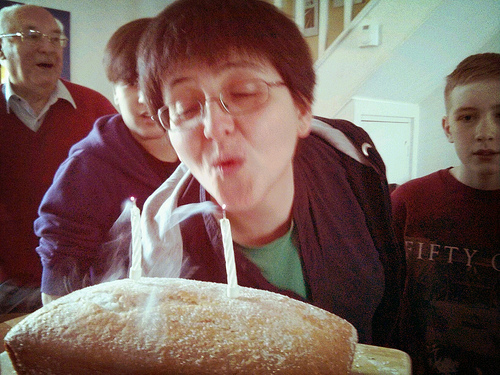

In [17]:
b = []
for a in annotations:
    if "cake" in a['true_caption'] and " behind " in a['true_caption']:
    #if a['true_caption'] == "the cake is on top of the cake":
        print(a["image_id"], a['true_caption'])
        b.append(a["image_id"])
id = random.choice(b)
#id = 2348341
print(id)
im = Image.open(f"/data/yingshac/clevr_control/data/vl_models_are_bows/images/{id}.jpg")
im

In [4]:
im.size

(500, 375)

In [4]:
relations

{'above',
 'at',
 'behind',
 'below',
 'beneath',
 'carrying',
 'covered by',
 'covered in',
 'covered with',
 'covering',
 'cutting',
 'eating',
 'feeding',
 'grazing on',
 'hanging on',
 'holding',
 'in',
 'in front of',
 'inside',
 'leaning against',
 'leaning on',
 'looking at',
 'lying in',
 'lying on',
 'on',
 'on top of',
 'parked on',
 'pulled by',
 'pulling',
 'reflected in',
 'resting on',
 'riding',
 'sitting at',
 'sitting in',
 'sitting on',
 'sitting on top of',
 'standing by',
 'standing in',
 'standing on',
 'surrounded by',
 'to the left of',
 'to the right of',
 'under',
 'using',
 'walking in',
 'walking on',
 'watching',
 'wearing'}

In [46]:
captions = Counter([x["true_caption"] for x in annotations])
captions.most_common(200)

[('the man is wearing the shirt', 179),
 ('the clouds is in the sky', 66),
 ('the woman is wearing the shirt', 53),
 ('the man is to the left of the woman', 46),
 ('the woman is to the right of the man', 46),
 ('the man is wearing the jacket', 43),
 ('the woman is to the left of the man', 43),
 ('the man is to the right of the woman', 43),
 ('the plate is on the table', 39),
 ('the boy is wearing the shirt', 38),
 ('the building is to the left of the tree', 37),
 ('the tree is to the right of the building', 37),
 ('the man is wearing the pants', 36),
 ('the man is to the left of the shirt', 35),
 ('the shirt is to the right of the man', 35),
 ('the cloud is in the sky', 35),
 ('the bus is on the road', 32),
 ('the building is to the right of the sky', 32),
 ('the sky is to the left of the building', 32),
 ('the man is to the right of the shirt', 31),
 ('the shirt is to the left of the man', 31),
 ('the woman is to the right of the shirt', 30),
 ('the shirt is to the left of the woman',

In [4]:
entropy_funcs = [
    # "concept_centric_entropy3(num_nouns, num_relations, df)",
    # "concept_centric_entropy4(num_nouns, num_relations, df)",
    # "concept_centric_entropy5(num_nouns, num_relations, df)",
    # "relation_centric_entropy3(num_nouns, num_relations, df)",
    # "relation_centric_entropy4(num_nouns, num_relations, df)",
    # "relation_centric_entropy5(num_nouns, num_relations, df)",
    # "divergence(num_nouns, num_relations, df)",
    # "divergence2(num_nouns, num_relations, df)",
    # "divergence3(num_nouns, num_relations, df)",
    # "concept_role_entropy(num_nouns, df)",
    # "concept_role_entropy2(num_nouns, df)",
    # "role_association(num_nouns, df)",
    # "role_association2(num_nouns, df)",
    # "concept_entropy(num_nouns, df)",
    # "concept_entropy2(num_nouns, df)",
    # "concept_entropy0(num_nouns, df)",
    "concept_role_index_entropy(num_nouns, df)"
]

### 48 Relations (verbs + positional)

In [284]:
transpose = False

SUBJ, OBJ = [], []
tuples = []
relations = set([x["relation_name"] for x in annotations])
print("#relations = ", len(relations))
for a in annotations:
    r = a['relation_name']
    subj, obj = re.findall(rf'the ([a-zA-Z\s-]+) is {r} the ([a-zA-Z\s]+)', a['true_caption'])[0]

    #singularize
    singlular_subj = Word(subj).lemmatize()
    if not singlular_subj == False: subj = singlular_subj
    singlular_obj = Word(obj).lemmatize() 
    if not singlular_obj == False: obj = singlular_obj

    SUBJ.append(subj)
    OBJ.append(obj)
    tuples.append((subj, obj, r))
print("#unique subjects = ", len(set(SUBJ)))
print("#unique objects = ", len(set(OBJ)))
nouns = sorted(list(set(SUBJ).union(set(OBJ))))
num_nouns = len(nouns)
print("#unique concepts = ", num_nouns)
num_relations = len(relations)
print("#instances = ", len(tuples))

train_triplets = [] # convert tuple elements to indices
n2i = {n:i for i, n in enumerate(nouns)}
r2i = {r:i for i, r in enumerate(relations)}
print(len(r2i), len(n2i))

for subj, obj, r in tuples:
    train_triplets.append((n2i[subj], n2i[obj], r2i[r]))
if transpose: train_triplets = Transpose(train_triplets)

df = pd.DataFrame(train_triplets, columns =['O1', 'O2', 'R'])

#relations =  48
#unique subjects =  753
#unique objects =  752
#unique concepts =  790
#instances =  21944
48 790


In [285]:
print("role intrinsic meanings: {} position\n".format("image" if transpose else "linguistic"))
for f in entropy_funcs:
    score = eval(f)
    print(f.split("(")[0], ": ", score)

role intrinsic meanings: linguistic position

concept_centric_entropy3 :  2.9955506027378007
concept_centric_entropy4 :  1.4121281913224546
concept_centric_entropy5 :  1.281369504713808
relation_centric_entropy3 :  8.25011139306136
relation_centric_entropy4 :  4.699260278799732
relation_centric_entropy5 :  4.603511178548084
count_all = 21944
divergence :  -2.1019063077085844
divergence2 :  -0.4518344935637687
divergence3 :  -0.5825931801724241
concept_role_entropy :  4.5884101576232315
concept_role_entropy2 :  4.623419743980259
role_association :  3.298832023892253
role_association2 :  3.333841610249327
concept_entropy :  5.151094772363453
concept_entropy2 :  5.186104358720435
concept_entropy0 :  5.176008850384905
concept_role_index_entropy :  0.6624859922086349


### Positional Relations

In [5]:
positional_rel_v = ["above", "below", "beneath", "on", "on top of", "under"]
positional_rel_h = ["to the left of", "to the right of"]
positional_rel_fb = ["in front of", "behind"]

In [6]:
D= defaultdict(list)
for a in annotations:
    r = a['relation_name']
    if r in positional_rel_fb + positional_rel_h + positional_rel_v: 
        text = a['true_caption']
        subj, obj = re.findall(rf'the ([a-zA-Z\s-]+) is {r} the ([a-zA-Z\s]+)', text)[0]
        D[r].append((a['image_path'], text, (subj, obj, r)))
for k in D:
    print(k, len(D[k]))
print("dataset size = ", sum([len(D[k]) for k in D]))

to the left of 7741
on 1684
to the right of 7741
under 132
below 209
on top of 201
above 269
behind 574
in front of 588
beneath 10
dataset size =  19149


In [7]:
print("#unique images = ", len(set([x[0] for k in D for x in D[k]])))
print("#unique captions = ", len(set([x[1] for k in D for x in D[k]])))
print("#unique concepts = ", len(set([x[2][0] for k in D for x in D[k]] + [x[2][1] for k in D for x in D[k]])))

#unique images =  4348
#unique captions =  12163
#unique concepts =  885


In [14]:
json.dump(D, open("../data/vl_models_are_bows/tmp.json", "w"), indent=4)

### Left-Right

In [37]:
SUBJ, OBJ = [], []
tuples, images, captions = [], [], []
for a in annotations:
    r = a['relation_name']
    if not r in positional_rel_h: continue
    subj, obj = re.findall(rf'the ([a-zA-Z\s-]+) is {r} the ([a-zA-Z\s]+)', a['true_caption'])[0]

    #singularize
    singlular_subj = Word(subj).lemmatize()
    if not singlular_subj == False: subj = singlular_subj
    singlular_obj = Word(obj).lemmatize() 
    if not singlular_obj == False: obj = singlular_obj

    SUBJ.append(subj)
    OBJ.append(obj)
    tuples.append((subj, obj, r))
    captions.append(a['true_caption'])
    images.append(a['image_path'])
print("#unique subjects = ", len(set(SUBJ)))
print("#unique objects = ", len(set(OBJ)))
nouns = sorted(list(set(SUBJ).union(set(OBJ))))
num_nouns = len(nouns)
print("#unique concepts = ", num_nouns)
num_relations = len(positional_rel_h)
print("#instances = ", len(tuples))
print("#unique instances = ", len(set(tuples)))
print("#unique images = ", len(set(images)))
print("#unique captions = ", len(set(captions)))


n2i = {n:i for i, n in enumerate(nouns)}
r2i = {r:i for i, r in enumerate(positional_rel_h)}
print(len(r2i), len(n2i))


#unique subjects =  694
#unique objects =  694
#unique concepts =  695
#instances =  15482
#unique instances =  9362
#unique images =  3244
#unique captions =  9816
2 695


In [38]:
transpose =  False

train_triplets = [] # convert tuple elements to indices
for subj, obj, r in tuples:
    train_triplets.append((n2i[subj], n2i[obj], r2i[r]))
if transpose: train_triplets = Transpose(train_triplets)

df = pd.DataFrame(train_triplets, columns =['O1', 'O2', 'R'])

print("role intrinsic meanings: {} position\n".format("image" if transpose else "linguistic"))
for f in entropy_funcs:
    score = eval(f)
    print(f.split("(")[0], ": ", score, f"({round(score/np.log(2), 2)})")

role intrinsic meanings: linguistic position

concept_role_index_entropy :  0.6845756843700138 (0.99)


In [39]:
print("role intrinsic meanings: {} position\nA set of complete objects:".format("image" if transpose else "linguistic"))
tmp1, tmp2 = set([t[0] for t in train_triplets]), set([t[1] for t in train_triplets])
cpl1, cpl2 = len(tmp1)/num_nouns, len(tmp2)/num_nouns
complete = tmp1.intersection(tmp2)
print(f"CPL(r1) = {round(cpl1, 2)}, CPL(r2) = {round(cpl2, 2)}, avg = {round((cpl1+cpl2)/2, 2)}")
print(complete)
print(len(complete))

role intrinsic meanings: linguistic position
A set of complete objects:
CPL(r1) = 1.0, CPL(r2) = 1.0, avg = 1.0
{0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 182, 183, 184, 185, 186, 187, 188, 189, 190, 191, 192, 193, 194, 195, 196, 197, 198, 19

In [11]:
# complete nouns under linguistic positions
a = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 182, 183, 184, 185, 186, 187, 188, 189, 190, 191, 192, 193, 194, 195, 196, 197, 198, 199, 200, 201, 202, 203, 204, 205, 206, 207, 208, 209, 210, 211, 212, 213, 214, 215, 216, 217, 218, 219, 220, 221, 222, 223, 224, 225, 226, 227, 228, 229, 230, 231, 232, 233, 234, 235, 236, 237, 238, 239, 240, 241, 242, 243, 244, 245, 246, 247, 248, 249, 250, 251, 252, 253, 254, 255, 256, 257, 258, 259, 260, 261, 262, 263, 264, 265, 266, 267, 268, 269, 270, 271, 272, 273, 274, 275, 276, 277, 278, 279, 280, 281, 282, 283, 284, 285, 286, 287, 288, 289, 290, 291, 292, 293, 294, 295, 296, 297, 298, 299, 300, 301, 302, 303, 304, 305, 306, 307, 308, 309, 310, 311, 312, 313, 314, 315, 316, 317, 318, 319, 320, 321, 322, 323, 324, 325, 326, 327, 328, 329, 330, 331, 332, 333, 334, 335, 336, 337, 338, 339, 340, 341, 342, 343, 344, 345, 346, 347, 348, 349, 350, 351, 352, 353, 354, 355, 356, 357, 358, 359, 360, 361, 362, 363, 364, 365, 366, 367, 368, 369, 370, 371, 372, 373, 374, 375, 376, 377, 378, 379, 380, 381, 382, 383, 384, 385, 386, 387, 388, 389, 390, 391, 392, 393, 394, 395, 396, 397, 398, 399, 400, 401, 402, 403, 404, 405, 406, 407, 408, 409, 410, 411, 412, 413, 414, 415, 416, 417, 418, 419, 420, 421, 422, 423, 424, 425, 426, 427, 428, 429, 430, 431, 432, 433, 434, 435, 436, 437, 438, 439, 440, 441, 442, 443, 444, 445, 446, 447, 448, 449, 450, 451, 452, 453, 454, 455, 456, 457, 458, 459, 460, 461, 462, 463, 464, 465, 466, 467, 468, 469, 470, 471, 472, 473, 474, 475, 476, 477, 478, 479, 480, 481, 482, 483, 484, 485, 486, 487, 488, 489, 490, 491, 492, 493, 494, 495, 496, 497, 498, 499, 500, 501, 502, 503, 504, 505, 506, 507, 508, 509, 510, 511, 512, 513, 514, 515, 516, 517, 518, 519, 520, 521, 522, 523, 524, 525, 526, 527, 528, 529, 530, 531, 532, 533, 534, 535, 536, 537, 538, 539, 540, 541, 542, 543, 544, 545, 546, 547, 548, 549, 550, 551, 552, 553, 554, 555, 556, 557, 558, 559, 560, 561, 562, 563, 564, 565, 566, 567, 568, 569, 570, 571, 572, 573, 574, 575, 576, 577, 578, 579, 580, 581, 582, 583, 584, 585, 586, 587, 588, 589, 590, 591, 592, 593, 594, 595, 596, 597, 598, 599, 602, 603, 604, 605, 606, 607, 608, 609, 610, 611, 612, 613, 614, 615, 616, 617, 618, 619, 620, 621, 622, 623, 624, 625, 626, 627, 628, 629, 630, 631, 632, 633, 634, 635, 636, 637, 638, 639, 640, 641, 642, 643, 644, 645, 646, 647, 648, 649, 650, 651, 652, 653, 654, 655, 656, 657, 658, 659, 660, 661, 662, 663, 664, 665, 666, 667, 668, 669, 670, 671, 672, 673, 674, 675, 676, 677, 678, 679, 680, 681, 682, 683, 684, 685, 686, 687, 688, 689, 690, 691, 692, 693, 694]
# complete nouns under image positions
b = [0, 1, 3, 6, 9, 15, 16, 17, 18, 19, 22, 25, 28, 29, 33, 34, 36, 37, 41, 43, 44, 45, 46, 47, 51, 52, 54, 55, 57, 58, 61, 62, 64, 65, 66, 67, 68, 69, 70, 73, 74, 75, 76, 77, 78, 79, 80, 81, 84, 85, 86, 87, 89, 91, 93, 94, 95, 97, 99, 100, 103, 104, 106, 107, 108, 110, 111, 112, 113, 115, 116, 118, 119, 121, 122, 123, 124, 126, 127, 130, 132, 133, 134, 136, 137, 138, 139, 140, 141, 143, 146, 148, 149, 151, 153, 154, 157, 159, 160, 161, 162, 163, 164, 169, 170, 171, 172, 173, 174, 176, 178, 180, 183, 185, 189, 190, 192, 195, 196, 200, 201, 203, 204, 206, 207, 209, 210, 211, 213, 214, 215, 216, 217, 220, 221, 222, 224, 225, 226, 228, 229, 230, 232, 234, 236, 239, 240, 241, 244, 245, 246, 248, 250, 251, 252, 253, 256, 257, 263, 264, 267, 268, 269, 271, 273, 275, 276, 277, 278, 279, 280, 282, 287, 290, 292, 293, 294, 295, 296, 297, 299, 300, 302, 303, 305, 307, 308, 310, 312, 314, 315, 316, 322, 324, 325, 326, 328, 330, 331, 332, 334, 335, 336, 337, 338, 340, 341, 342, 344, 347, 348, 349, 350, 353, 354, 355, 356, 360, 361, 362, 364, 368, 369, 370, 371, 374, 376, 377, 379, 380, 384, 385, 386, 388, 390, 395, 396, 397, 400, 401, 404, 406, 407, 408, 410, 413, 414, 417, 418, 420, 423, 424, 425, 426, 427, 428, 429, 432, 434, 435, 436, 437, 439, 441, 442, 443, 444, 445, 447, 448, 450, 452, 453, 455, 457, 458, 460, 462, 463, 464, 465, 466, 469, 475, 477, 478, 480, 483, 485, 486, 487, 488, 489, 490, 493, 495, 496, 498, 500, 502, 503, 504, 505, 506, 509, 511, 512, 513, 516, 517, 518, 519, 522, 523, 524, 525, 526, 527, 528, 529, 532, 533, 534, 535, 536, 537, 538, 540, 543, 544, 545, 548, 549, 553, 555, 557, 559, 560, 561, 564, 565, 567, 568, 572, 573, 574, 576, 577, 580, 581, 582, 583, 585, 587, 588, 589, 590, 591, 593, 594, 595, 596, 600, 601, 602, 603, 605, 606, 607, 609, 611, 612, 613, 614, 615, 616, 617, 618, 621, 622, 626, 627, 628, 629, 630, 631, 635, 636, 638, 641, 643, 644, 646, 647, 648, 650, 652, 653, 654, 655, 657, 659, 660, 662, 663, 664, 665, 666, 673, 674, 675, 676, 677, 678, 679, 682, 684, 686, 687, 688, 689, 692, 693]
print("A set of nouns with complete support under both role meanings:")
both_complete_nouns = [n for i, n in enumerate(nouns) if i in a and i in b]
print(both_complete_nouns)
print(len(both_complete_nouns))
print("#instances formed by both_complete_nouns: ", 
      len([t for t in tuples if t[0] in both_complete_nouns and t[1] in both_complete_nouns]))

A set of nouns with complete support under both role meanings:
['air', 'airplane', 'animal', 'apple', 'arm', 'avocado', 'baby', 'backpack', 'bacon', 'bag', 'balcony', 'banana', 'barn', 'barrier', 'basket', 'bat', 'bathtub', 'batter', 'bear', 'bed', 'bedding', 'bedroom', 'bedspread', 'beef', 'bell tower', 'bench', 'bicycle', 'bike', 'bird', 'blanket', 'blender', 'blind', 'blouse', 'boat', 'book', 'bookcase', 'bookshelf', 'boot', 'bottle', 'bowl', 'box', 'boy', 'branch', 'bread', 'breakfast', 'brick', 'bridge', 'broccoli', 'bucket', 'building', 'bull', 'bun', 'bus', 'bush', 'cabbage', 'cabin', 'cabinet', 'cable', 'cage', 'cake', 'camera', 'can', 'canopy', 'cap', 'car', 'carpet', 'carriage', 'carrot', 'cart', 'cat', 'catcher', 'ceiling', 'cell phone', 'chain', 'chair', 'chandelier', 'cheese', 'chicken', 'child', 'church', 'cliff', 'clock', 'clock tower', 'clothes', 'cloud', 'coat', 'coffee', 'coffee cup', 'coffee mug', 'coffee table', 'collar', 'comforter', 'computer', 'computer monitor',

In [12]:
heatmap = {}
for transpose in [False, True]:
    train_triplets = []
    for subj, obj, r in tuples:
        train_triplets.append((n2i[subj], n2i[obj], r2i[r]))
    if transpose: train_triplets = Transpose(train_triplets)

    c = Counter(train_triplets)
    print(c.most_common(3))

    prefix = "image" if transpose else "linguistic"
    heatmap[prefix] = np.zeros((len(both_complete_nouns), len(both_complete_nouns)))
    X = []
    for k, o1 in enumerate(both_complete_nouns):
        for l, o2 in enumerate(both_complete_nouns):
            x = c[(n2i[o1], n2i[o2], 0)] + c[(n2i[o1], n2i[o2], 1)]
            X.append(x)
            heatmap[prefix][k][l] = x


[((355, 688, 0), 46), ((688, 355, 1), 46), ((688, 355, 0), 43)]
[((355, 688, 0), 46), ((355, 688, 1), 46), ((688, 355, 0), 43)]


In [13]:
dead = []
iters = 0
killed_this_iter = True
while np.sum(heatmap['image']) * np.sum(heatmap['linguistic']) > 0 and killed_this_iter:
    killed_this_iter = False
    sum_axis0, sum_axis1 = np.sum(heatmap['image'], axis=0), np.sum(heatmap['image'], axis=1)
    for i, s in enumerate(sum_axis0):
        if i in dead: continue
        if s == 0:
            for j in range(len(both_complete_nouns)):
                # drop row i
                heatmap['image'][i][j] = 0
                # drop row i and col i
                heatmap['linguistic'][i][j] = 0
                heatmap['linguistic'][j][i] = 0

            dead.append(i)
            killed_this_iter = True
    for i, s in enumerate(sum_axis1):
        if i in dead: continue
        if s == 0:
            for j in range(len(both_complete_nouns)):
                # drop col i
                heatmap['image'][j][i] = 0
                # drop row i and col i
                heatmap['linguistic'][i][j] = 0
                heatmap['linguistic'][j][i] = 0
            dead.append(i)
            killed_this_iter = True

    sum_axis0, sum_axis1 = np.sum(heatmap['linguistic'], axis=0), np.sum(heatmap['linguistic'], axis=1)
    for i, s in enumerate(sum_axis0):
        if i in dead: continue
        if s == 0:
            for j in range(len(both_complete_nouns)):
                # drop row i
                heatmap['linguistic'][i][j] = 0
                # drop row i and col i
                heatmap['image'][i][j] = 0
                heatmap['image'][j][i] = 0

            dead.append(i)
            killed_this_iter = True
    for i, s in enumerate(sum_axis1):
        if i in dead: continue
        if s == 0:
            for j in range(len(both_complete_nouns)):
                # drop col i
                heatmap['linguistic'][j][i] = 0
                # drop row i and col i
                heatmap['image'][i][j] = 0
                heatmap['image'][j][i] = 0
            dead.append(i)
            killed_this_iter = True

    iters += 1
    print(f"dead nouns = {len(dead)}")
    print(f"""finish iter {iters}, 
          remaining examples = {np.sum(heatmap['image'])} (image), 
          {np.sum(heatmap['linguistic'])} (linguistic)""")    


dead nouns = 7
finish iter 1, 
          remaining examples = 14352.0 (image), 
          14352.0 (linguistic)
dead nouns = 7
finish iter 2, 
          remaining examples = 14352.0 (image), 
          14352.0 (linguistic)


In [14]:
alive = set(list(range(len(both_complete_nouns)))) - set(dead)
alive = sorted(list(alive))
print("nouns with complete support".format(alive))
print(len(alive))
rows = np.array(alive, dtype=np.intp)
columns = np.array(alive, dtype=np.intp)

bijective_heatmap = heatmap['linguistic'][np.ix_(rows, columns)]
print("sanity check (linguistic): every row sum or col sum is positive")
print(np.min(np.sum(bijective_heatmap, axis=0)), np.min(np.sum(bijective_heatmap, axis=1)))

bijective_heatmap = heatmap['image'][np.ix_(rows, columns)]
print("sanity check (image): every row sum or col sum is positive")
print(np.min(np.sum(bijective_heatmap, axis=0)), np.min(np.sum(bijective_heatmap, axis=1)))


nouns with complete support
414
sanity check (linguistic): every row sum or col sum is positive
2.0 2.0
sanity check (image): every row sum or col sum is positive
2.0 2.0


In [15]:
crux = alive # They are both_complete_nouns' indices
print(len(crux))
crux_nouns = [both_complete_nouns[i] for i in crux]
#pprint(crux_nouns)

414


In [17]:
for transpose in [False, True]:
    print("role intrinsic meanings: {} position\n".format("image" if transpose else "linguistic"))
    SUBJ, OBJ = [], []
    tuples, images, captions = [], [], []
    for a in annotations:
        r = a['relation_name']
        if not r in positional_rel_h: continue
        
        subj, obj = re.findall(rf'the ([a-zA-Z\s-]+) is {r} the ([a-zA-Z\s]+)', a['true_caption'])[0]

        #singularize
        singlular_subj = Word(subj).lemmatize()
        if not singlular_subj == False: subj = singlular_subj
        singlular_obj = Word(obj).lemmatize() 
        if not singlular_obj == False: obj = singlular_obj

        if subj in crux_nouns and obj in crux_nouns:
            SUBJ.append(subj)
            OBJ.append(obj)
            tuples.append((subj, obj, r))
            captions.append(a['true_caption'])
            images.append(a['image_path'])
    
    nouns = sorted(list(set(SUBJ).union(set(OBJ))))
    num_nouns = len(nouns)
    print("#unique concepts = ", num_nouns)
    num_relations = len(positional_rel_h)
    print("#instances = ", len(tuples))

    print("#unique instances = ", len(set(tuples)))
    print("#unique images = ", len(set(images)))
    print("#unique captions = ", len(set(captions)))
    
    train_triplets = [] # convert tuple elements to indices
    n2i = {n:i for i, n in enumerate(nouns)}
    r2i = {r:i for i, r in enumerate(positional_rel_h)}
    print(len(r2i), len(n2i), "\n")
    for subj, obj, r in tuples:
        train_triplets.append((n2i[subj], n2i[obj], r2i[r]))
    if transpose: train_triplets = Transpose(train_triplets)

    # Sanity check crux_nouns are indeed complete under both linguistic & image positional roles
    print("#unique O1 = ", len(set([t[0] for t in train_triplets])))
    print("#unique O2 = ", len(set([t[1] for t in train_triplets])))
    df = pd.DataFrame(train_triplets, columns =['O1', 'O2', 'R'])
    for f in entropy_funcs:
        score = eval(f)
        print(f.split("(")[0], ": ", score, f"({round(score/np.log(2), 2)})") 
    print("--------------------------------------------------------\n\n")

role intrinsic meanings: linguistic position

#unique concepts =  414
#instances =  14352
#unique instances =  8322
#unique images =  3074
#unique captions =  8766
2 414 

#unique O1 =  414
#unique O2 =  414
concept_role_index_entropy :  0.6855820957920556 (0.99)
--------------------------------------------------------


role intrinsic meanings: image position

#unique concepts =  414
#instances =  14352
#unique instances =  8322
#unique images =  3074
#unique captions =  8766
2 414 

#unique O1 =  414
#unique O2 =  414
concept_role_index_entropy :  0.6672154918567329 (0.96)
--------------------------------------------------------




In [279]:
if transpose:
    print(len(train_triplets))
    print("train_triplets under {} positional roles:".format("image" if transpose else "linguistic"))
    print(train_triplets)
    print("unique train_triplets = {}".format(len(set(train_triplets))))

14352
train_triplets under image positional roles:
[(117, 306, 0), (117, 211, 0), (117, 211, 1), (117, 306, 1), (321, 410, 0), (321, 410, 1), (186, 410, 1), (35, 410, 1), (35, 410, 0), (186, 410, 0), (356, 151, 1), (356, 151, 0), (72, 95, 0), (72, 95, 1), (400, 180, 0), (374, 180, 0), (374, 180, 1), (400, 180, 1), (278, 268, 0), (278, 268, 1), (158, 306, 0), (158, 306, 1), (187, 139, 1), (400, 139, 1), (400, 323, 1), (47, 323, 1), (400, 139, 0), (400, 323, 0), (187, 139, 0), (47, 323, 0), (115, 246, 1), (99, 246, 1), (99, 246, 1), (115, 246, 1), (99, 246, 0), (99, 163, 0), (99, 163, 0), (99, 246, 0), (115, 246, 0), (99, 163, 1), (99, 163, 1), (115, 246, 0), (356, 314, 0), (356, 314, 1), (253, 171, 0), (253, 211, 0), (253, 171, 1), (253, 211, 1), (115, 158, 1), (115, 240, 1), (115, 240, 0), (115, 158, 0), (306, 198, 1), (29, 32, 1), (211, 32, 1), (211, 34, 1), (29, 32, 0), (211, 32, 0), (211, 34, 0), (306, 198, 0), (37, 169, 1), (148, 169, 1), (37, 169, 0), (148, 169, 0), (82, 136, 1), 

In [274]:
for t in train_triplets:
    if t[0] == t[1]: print(t)

'cow'

### Front-Behind

In [64]:
SUBJ, OBJ = [], []
tuples, images, captions = [], [], []
for a in annotations:
    r = a['relation_name']
    if not r in positional_rel_fb: continue
    subj, obj = re.findall(rf'the ([a-zA-Z\s-]+) is {r} the ([a-zA-Z\s]+)', a['true_caption'])[0]

    #singularize
    singlular_subj = Word(subj).lemmatize()
    if not singlular_subj == False: subj = singlular_subj
    singlular_obj = Word(obj).lemmatize() 
    if not singlular_obj == False: obj = singlular_obj

    SUBJ.append(subj)
    OBJ.append(obj)
    tuples.append((subj, obj, r))
    captions.append(a['true_caption'])
    images.append(a['image_path'])
print("#unique subjects = ", len(set(SUBJ)))
print("#unique objects = ", len(set(OBJ)))
nouns = sorted(list(set(SUBJ).union(set(OBJ))))
num_nouns = len(nouns)
print("#unique concepts = ", num_nouns)
num_relations = len(positional_rel_fb)
print("#instances = ", len(tuples))
print("#unique instances = ", len(set(tuples)))
print("#unique images = ", len(set(images)))
print("#unique captions = ", len(set(captions)))

n2i = {n:i for i, n in enumerate(nouns)}
r2i = {r:i for i, r in enumerate(positional_rel_fb)}
print(len(r2i), len(n2i))

#unique subjects =  193
#unique objects =  204
#unique concepts =  209
#instances =  1162
#unique instances =  775
#unique images =  527
#unique captions =  834
2 209


In [76]:
transpose = False

train_triplets= [] # convert tuple elements to indices
for subj, obj, r in tuples:
    train_triplets.append((n2i[subj], n2i[obj], r2i[r]))
if transpose: train_triplets = Transpose(train_triplets)

df = pd.DataFrame(train_triplets, columns =['O1', 'O2', 'R'])

print("role intrinsic meanings: {} position\n".format("image" if transpose else "linguistic"))
for f in entropy_funcs:
    score = eval(f)
    print(f.split("(")[0], ": ", score, f"({round(score/np.log(2), 2)})")

role intrinsic meanings: linguistic position

concept_role_index_entropy :  0.6811397655659784 (0.98)


In [77]:
print("role intrinsic meanings: {} position\nA set of complete objects:".format("image" if transpose else "linguistic"))
tmp1, tmp2 = set([t[0] for t in train_triplets]), set([t[1] for t in train_triplets])
cpl1, cpl2 = len(tmp1)/num_nouns, len(tmp2)/num_nouns
complete = tmp1.intersection(tmp2)
print(f"CPL(r1) = {round(cpl1, 2)}, CPL(r2) = {round(cpl2, 2)}, avg = {round((cpl1+cpl2)/2, 2)}")
print(complete)
print(len(complete))

role intrinsic meanings: linguistic position
A set of complete objects:
CPL(r1) = 0.92, CPL(r2) = 0.98, avg = 0.95
{0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 41, 42, 43, 44, 45, 46, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 70, 71, 72, 73, 74, 75, 77, 78, 80, 81, 82, 83, 84, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 99, 102, 103, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 152, 153, 154, 155, 157, 158, 159, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 177, 179, 181, 182, 183, 184, 185, 186, 187, 188, 189, 190, 191, 192, 193, 194, 195, 196, 197, 198, 199, 200, 201, 202, 203, 204, 206, 207, 208}
188


In [78]:
# complete nouns under linguistic positions
a = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 41, 42, 43, 44, 45, 46, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 70, 71, 72, 73, 74, 75, 77, 78, 80, 81, 82, 83, 84, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 99, 102, 103, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 152, 153, 154, 155, 157, 158, 159, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 177, 179, 181, 182, 183, 184, 185, 186, 187, 188, 189, 190, 191, 192, 193, 194, 195, 196, 197, 198, 199, 200, 201, 202, 203, 204, 206, 207, 208]
# complete nouns under image positions
b = [1, 3, 7, 10, 13, 16, 17, 18, 20, 23, 25, 26, 29, 30, 31, 32, 33, 34, 36, 39, 41, 42, 44, 46, 53, 57, 59, 60, 64, 67, 74, 77, 78, 79, 83, 88, 90, 91, 92, 93, 94, 102, 104, 105, 107, 108, 110, 113, 118, 122, 123, 124, 126, 137, 138, 141, 144, 145, 151, 152, 162, 163, 164, 171, 174, 177, 186, 187, 189, 192, 193, 194, 196, 201, 202, 203, 204, 206, 207, 208]
print("A set of nouns with complete support under both role meanings:")
both_complete_nouns = [n for i, n in enumerate(nouns) if i in a and i in b]
print(both_complete_nouns)
print(len(both_complete_nouns))
print("#instances formed by both_complete_nouns: ", 
      len([t for t in tuples if t[0] in both_complete_nouns and t[1] in both_complete_nouns]))

A set of nouns with complete support under both role meanings:
['airplane', 'animal', 'banana', 'basket', 'bear', 'bench', 'bicycle', 'bike', 'bird', 'blender', 'boat', 'book', 'box', 'boy', 'branch', 'building', 'bus', 'bush', 'camera', 'cart', 'cat', 'catcher', 'chair', 'child', 'computer', 'couch', 'couple', 'cow', 'curtain', 'desk', 'door', 'elephant', 'fence', 'floor', 'fountain', 'gate', 'giraffe', 'girl', 'glass', 'grass', 'headboard', 'horse', 'house', 'kettle', 'lady', 'laptop', 'man', 'men', 'mirror', 'motorcycle', 'net', 'people', 'person', 'pillow', 'plant', 'plate', 'rock', 'sidewalk', 'sign', 'sink', 'sofa', 'stair', 'statue', 'table', 'teddy bear', 'tent', 'toilet', 'tower', 'train', 'tree', 'vase', 'vehicle', 'wall', 'water', 'window', 'woman', 'zebra']
77
#instances formed by both_complete_nouns:  802


In [79]:
heatmap = {}
for transpose in [False, True]:
    train_triplets = []
    for subj, obj, r in tuples:
        train_triplets.append((n2i[subj], n2i[obj], r2i[r]))
    if transpose: train_triplets = Transpose(train_triplets)

    c = Counter(train_triplets)
    print(c.most_common(3))

    prefix = "image" if transpose else "linguistic"
    heatmap[prefix] = np.zeros((len(both_complete_nouns), len(both_complete_nouns)))
    X = []
    for k, o1 in enumerate(both_complete_nouns):
        for l, o2 in enumerate(both_complete_nouns):
            x = c[(n2i[o1], n2i[o2], 0)] + c[(n2i[o1], n2i[o2], 1)]
            X.append(x)
            heatmap[prefix][k][l] = x


[((91, 196, 0), 18), ((196, 91, 1), 18), ((203, 118, 1), 15)]
[((91, 196, 0), 18), ((91, 196, 1), 18), ((118, 203, 1), 15)]


In [80]:
dead = []
iters = 0
killed_this_iter = True
while np.sum(heatmap['image']) * np.sum(heatmap['linguistic']) > 0 and killed_this_iter:
    killed_this_iter = False
    sum_axis0, sum_axis1 = np.sum(heatmap['image'], axis=0), np.sum(heatmap['image'], axis=1)
    for i, s in enumerate(sum_axis0):
        if i in dead: continue
        if s == 0:
            for j in range(len(both_complete_nouns)):
                # drop row i
                heatmap['image'][i][j] = 0
                # drop row i and col i
                heatmap['linguistic'][i][j] = 0
                heatmap['linguistic'][j][i] = 0

            dead.append(i)
            killed_this_iter = True
    for i, s in enumerate(sum_axis1):
        if i in dead: continue
        if s == 0:
            for j in range(len(both_complete_nouns)):
                # drop col i
                heatmap['image'][j][i] = 0
                # drop row i and col i
                heatmap['linguistic'][i][j] = 0
                heatmap['linguistic'][j][i] = 0
            dead.append(i)
            killed_this_iter = True

    sum_axis0, sum_axis1 = np.sum(heatmap['linguistic'], axis=0), np.sum(heatmap['linguistic'], axis=1)
    for i, s in enumerate(sum_axis0):
        if i in dead: continue
        if s == 0:
            for j in range(len(both_complete_nouns)):
                # drop row i
                heatmap['linguistic'][i][j] = 0
                # drop row i and col i
                heatmap['image'][i][j] = 0
                heatmap['image'][j][i] = 0

            dead.append(i)
            killed_this_iter = True
    for i, s in enumerate(sum_axis1):
        if i in dead: continue
        if s == 0:
            for j in range(len(both_complete_nouns)):
                # drop col i
                heatmap['linguistic'][j][i] = 0
                # drop row i and col i
                heatmap['image'][i][j] = 0
                heatmap['image'][j][i] = 0
            dead.append(i)
            killed_this_iter = True

    iters += 1
    print(f"dead nouns = {len(dead)}")
    print(f"""finish iter {iters}, 
          remaining examples = {np.sum(heatmap['image'])} (image), 
          {np.sum(heatmap['linguistic'])} (linguistic)""")    


dead nouns = 15
finish iter 1, 
          remaining examples = 743.0 (image), 
          743.0 (linguistic)
dead nouns = 16
finish iter 2, 
          remaining examples = 741.0 (image), 
          741.0 (linguistic)
dead nouns = 16
finish iter 3, 
          remaining examples = 741.0 (image), 
          741.0 (linguistic)


In [81]:
alive = set(list(range(len(both_complete_nouns)))) - set(dead)
alive = sorted(list(alive))
print("nouns with complete support".format(alive))
print(len(alive))
rows = np.array(alive, dtype=np.intp)
columns = np.array(alive, dtype=np.intp)

bijective_heatmap = heatmap['linguistic'][np.ix_(rows, columns)]
print("sanity check (linguistic): every row sum or col sum is positive")
print(np.min(np.sum(bijective_heatmap, axis=0)), np.min(np.sum(bijective_heatmap, axis=1)))

bijective_heatmap = heatmap['image'][np.ix_(rows, columns)]
print("sanity check (image): every row sum or col sum is positive")
print(np.min(np.sum(bijective_heatmap, axis=0)), np.min(np.sum(bijective_heatmap, axis=1)))


nouns with complete support
61
sanity check (linguistic): every row sum or col sum is positive
1.0 1.0
sanity check (image): every row sum or col sum is positive
1.0 1.0


In [82]:
crux = alive # They are both_complete_nouns' indices
print(len(crux))
crux_nouns = [both_complete_nouns[i] for i in crux]
print(crux_nouns)

61
['animal', 'bear', 'bench', 'bicycle', 'bird', 'boat', 'book', 'box', 'branch', 'building', 'bus', 'bush', 'cat', 'chair', 'child', 'couch', 'couple', 'cow', 'curtain', 'desk', 'door', 'elephant', 'fence', 'floor', 'fountain', 'gate', 'giraffe', 'girl', 'grass', 'horse', 'house', 'lady', 'laptop', 'man', 'men', 'mirror', 'motorcycle', 'net', 'people', 'person', 'plant', 'rock', 'sidewalk', 'sign', 'sink', 'sofa', 'stair', 'statue', 'table', 'teddy bear', 'tent', 'toilet', 'tower', 'train', 'tree', 'vehicle', 'wall', 'water', 'window', 'woman', 'zebra']


In [85]:
for transpose in [False, True]:
    print("role intrinsic meanings: {} position\n".format("image" if transpose else "linguistic"))
    SUBJ, OBJ = [], []
    tuples, images, captions = [], [], []
    for a in annotations:
        r = a['relation_name']
        if not r in positional_rel_fb: continue
        
        subj, obj = re.findall(rf'the ([a-zA-Z\s-]+) is {r} the ([a-zA-Z\s]+)', a['true_caption'])[0]

        #singularize
        singlular_subj = Word(subj).lemmatize()
        if not singlular_subj == False: subj = singlular_subj
        singlular_obj = Word(obj).lemmatize() 
        if not singlular_obj == False: obj = singlular_obj

        if subj in crux_nouns and obj in crux_nouns:
            SUBJ.append(subj)
            OBJ.append(obj)
            tuples.append((subj, obj, r))
            captions.append(a['true_caption'])
            images.append(a['image_path'])
    
    nouns = sorted(list(set(SUBJ).union(set(OBJ))))
    num_nouns = len(nouns)
    print("#unique concepts = ", num_nouns)
    num_relations = len(positional_rel_fb)
    print("#instances = ", len(tuples))
    print("#unique instances = ", len(set(tuples)))
    print("#unique images = ", len(set(images)))
    print("#unique captions = ", len(set(captions)))
    
    train_triplets = [] # convert tuple elements to indices
    n2i = {n:i for i, n in enumerate(nouns)}
    r2i = {r:i for i, r in enumerate(positional_rel_fb)}
    print(len(r2i), len(n2i), "\n")
    for subj, obj, r in tuples:
        train_triplets.append((n2i[subj], n2i[obj], r2i[r]))
    if transpose: train_triplets = Transpose(train_triplets)

    # Sanity check crux_nouns are indeed complete under both linguistic & image positional roles
    print("#unique O1 = ", len(set([t[0] for t in train_triplets])))
    print("#unique O2 = ", len(set([t[1] for t in train_triplets])))
    df = pd.DataFrame(train_triplets, columns =['O1', 'O2', 'R'])
    for f in entropy_funcs:
        score = eval(f)
        print(f.split("(")[0], ": ", score, f"({round(score/np.log(2), 2)})") 
    print("--------------------------------------------------------\n\n")

role intrinsic meanings: linguistic position

#unique concepts =  61
#instances =  741
#unique instances =  396
#unique images =  335
#unique captions =  449
2 61 

#unique O1 =  61
#unique O2 =  61
concept_role_index_entropy :  0.6919879755557129 (1.0)
--------------------------------------------------------


role intrinsic meanings: image position

#unique concepts =  61
#instances =  741
#unique instances =  396
#unique images =  335
#unique captions =  449
2 61 

#unique O1 =  61
#unique O2 =  61
concept_role_index_entropy :  0.47068965931843215 (0.68)
--------------------------------------------------------




In [242]:
if transpose:
    print(len(train_triplets))
    print("train_triplets under {} positional roles:".format("image" if transpose else "linguistic"))
    print(train_triplets)
    print("unique train_triplets = {}".format(len(set(train_triplets))))
for t in train_triplets:
    if t[0] == t[1]: print(t)

741
train_triplets under image positional roles:
[(9, 33, 1), (9, 33, 0), (12, 48, 1), (12, 48, 0), (10, 54, 1), (10, 54, 0), (16, 22, 1), (16, 22, 0), (0, 54, 0), (0, 54, 1), (10, 54, 0), (10, 54, 1), (11, 9, 0), (11, 9, 1), (14, 15, 0), (14, 15, 1), (26, 54, 0), (26, 54, 1), (10, 54, 1), (10, 54, 0), (54, 9, 0), (54, 9, 1), (33, 9, 1), (33, 9, 0), (2, 28, 1), (33, 54, 0), (33, 54, 1), (23, 51, 0), (23, 51, 1), (2, 54, 1), (2, 54, 0), (16, 56, 1), (16, 56, 0), (10, 9, 1), (10, 9, 0), (60, 22, 0), (60, 22, 1), (26, 54, 0), (26, 54, 1), (26, 54, 1), (26, 54, 0), (3, 10, 1), (3, 10, 1), (3, 10, 0), (3, 10, 0), (27, 58, 0), (27, 58, 1), (33, 15, 1), (33, 15, 0), (26, 41, 1), (26, 41, 0), (22, 60, 1), (22, 60, 0), (22, 11, 1), (22, 11, 0), (12, 56, 0), (12, 56, 1), (12, 56, 0), (12, 56, 1), (22, 21, 1), (22, 21, 0), (56, 9, 0), (56, 9, 1), (12, 56, 1), (12, 56, 0), (9, 54, 1), (9, 54, 0), (15, 56, 1), (15, 56, 0), (29, 53, 1), (29, 53, 0), (12, 59, 0), (12, 59, 1), (38, 15, 1), (48, 38, 1)

### Top-Bottom (merged)

In [86]:
# positional_rel_v = ["above", "below", "beneath", "on", "on top of", "under"]
map = {
    "above": "top",
    "on": "top", 
    "on top of": "top", 
    "below": "bottom", 
    "beneath": "bottom",
    "under": "bottom"
}
relations = ["top", "bottom"]

SUBJ, OBJ = [], []
tuples, images, captions = [], [], []
for a in annotations:
    r = a['relation_name']
    if not r in positional_rel_v: continue
    
    subj, obj = re.findall(rf'the ([a-zA-Z\s-]+) is {r} the ([a-zA-Z\s]+)', a['true_caption'])[0]
    r = map[r]

    #singularize
    singlular_subj = Word(subj).lemmatize()
    if not singlular_subj == False: subj = singlular_subj
    singlular_obj = Word(obj).lemmatize() 
    if not singlular_obj == False: obj = singlular_obj

    SUBJ.append(subj)
    OBJ.append(obj)
    tuples.append((subj, obj, r))
    captions.append(a['true_caption'])
    images.append(a['image_path'])
    
    if (subj, obj, r) == ("computer", "computer", "top"): print(a['true_caption'])
print("#unique subjects = ", len(set(SUBJ)))
print("#unique objects = ", len(set(OBJ)))
nouns = sorted(list(set(SUBJ).union(set(OBJ))))
num_nouns = len(nouns)
print("#unique concepts = ", num_nouns)
num_relations = len(relations)
print("#instances = ", len(tuples))
print("#unique instances = ", len(set(tuples)))
print("#unique images = ", len(set(images)))
print("#unique captions = ", len(set(captions)))

n2i = {n:i for i, n in enumerate(nouns)}
r2i = {r:i for i, r in enumerate(relations)}
print(len(r2i), len(n2i))


#unique subjects =  386
#unique objects =  253
#unique concepts =  439
#instances =  2505
#unique instances =  1235
#unique images =  1553
#unique captions =  1513
2 439


In [91]:
transpose = False

train_triplets = [] # convert tuple elements to indices

for subj, obj, r in tuples:
    train_triplets.append((n2i[subj], n2i[obj], r2i[r]))    
if transpose: train_triplets = Transpose(train_triplets)

df = pd.DataFrame(train_triplets, columns =['O1', 'O2', 'R'])

print("role intrinsic meanings: {} position\n".format("image" if transpose else "linguistic"))
for f in entropy_funcs:
    score = eval(f)
    print(f.split("(")[0], ": ", score, f"({round(score/np.log(2), 2)})") 

role intrinsic meanings: linguistic position

concept_role_index_entropy :  0.4319355517755963 (0.62)


In [93]:
print("role intrinsic meanings: {} position\nA set of complete objects:".format("image" if transpose else "linguistic"))
tmp1, tmp2 = set([t[0] for t in train_triplets]), set([t[1] for t in train_triplets])
cpl1, cpl2 = len(tmp1)/num_nouns, len(tmp2)/num_nouns
complete = tmp1.intersection(tmp2)
print(f"CPL(r1) = {round(cpl1, 2)}, CPL(r2) = {round(cpl2, 2)}, avg = {round((cpl1+cpl2)/2, 2)}")
print(complete)
print(len(complete))

role intrinsic meanings: linguistic position
A set of complete objects:
CPL(r1) = 0.88, CPL(r2) = 0.58, avg = 0.73
{1, 2, 3, 9, 10, 12, 14, 15, 17, 19, 20, 24, 25, 27, 28, 30, 31, 32, 35, 36, 39, 40, 45, 46, 47, 49, 51, 52, 59, 60, 62, 64, 65, 68, 69, 72, 77, 78, 81, 82, 85, 86, 89, 92, 96, 97, 102, 103, 106, 107, 110, 116, 117, 118, 119, 120, 126, 127, 134, 135, 138, 139, 140, 142, 143, 145, 146, 147, 148, 149, 152, 156, 157, 158, 159, 162, 163, 165, 166, 168, 171, 173, 178, 179, 182, 184, 185, 189, 191, 192, 198, 199, 201, 203, 206, 210, 211, 219, 223, 228, 230, 232, 233, 236, 241, 243, 246, 247, 248, 249, 250, 251, 252, 253, 255, 259, 261, 262, 264, 266, 272, 274, 275, 277, 280, 283, 284, 285, 286, 287, 289, 291, 292, 294, 299, 302, 305, 306, 308, 313, 315, 319, 323, 326, 327, 329, 330, 331, 334, 335, 336, 338, 339, 340, 341, 342, 347, 348, 349, 350, 351, 352, 353, 354, 356, 357, 358, 359, 361, 368, 369, 372, 373, 374, 379, 380, 385, 386, 389, 390, 394, 397, 399, 402, 406, 411, 412,

In [94]:
# complete nouns under linguistic positions
a = [1, 2, 3, 9, 10, 12, 14, 15, 17, 19, 20, 24, 25, 27, 28, 30, 31, 32, 35, 36, 39, 40, 45, 46, 47, 49, 51, 52, 59, 60, 62, 64, 65, 68, 69, 72, 77, 78, 81, 82, 85, 86, 89, 92, 96, 97, 102, 103, 106, 107, 110, 116, 117, 118, 119, 120, 126, 127, 134, 135, 138, 139, 140, 142, 143, 145, 146, 147, 148, 149, 152, 156, 157, 158, 159, 162, 163, 165, 166, 168, 171, 173, 178, 179, 182, 184, 185, 189, 191, 192, 198, 199, 201, 203, 206, 210, 211, 219, 223, 228, 230, 232, 233, 236, 241, 243, 246, 247, 248, 249, 250, 251, 252, 253, 255, 259, 261, 262, 264, 266, 272, 274, 275, 277, 280, 283, 284, 285, 286, 287, 289, 291, 292, 294, 299, 302, 305, 306, 308, 313, 315, 319, 323, 326, 327, 329, 330, 331, 334, 335, 336, 338, 339, 340, 341, 342, 347, 348, 349, 350, 351, 352, 353, 354, 356, 357, 358, 359, 361, 368, 369, 372, 373, 374, 379, 380, 385, 386, 389, 390, 394, 397, 399, 402, 406, 411, 412, 414, 415, 418, 422, 423, 426, 427, 428, 431, 432, 435, 436, 438]
# complete nouns under image positions
b = [1, 2, 3, 10, 12, 14, 15, 19, 24, 25, 27, 28, 30, 31, 32, 36, 39, 40, 46, 49, 51, 52, 59, 60, 62, 64, 65, 68, 69, 72, 77, 78, 81, 82, 85, 89, 92, 96, 106, 107, 116, 117, 118, 134, 135, 138, 139, 142, 143, 146, 152, 156, 158, 159, 165, 166, 168, 173, 178, 179, 182, 184, 198, 199, 203, 210, 211, 219, 223, 228, 230, 232, 233, 241, 247, 248, 249, 250, 251, 252, 253, 259, 264, 266, 275, 277, 280, 283, 284, 286, 287, 289, 292, 294, 302, 308, 313, 318, 319, 323, 326, 327, 330, 334, 335, 336, 338, 339, 340, 341, 342, 348, 349, 350, 356, 357, 359, 368, 371, 372, 379, 380, 385, 386, 389, 397, 399, 402, 406, 411, 412, 415, 418, 422, 423, 426, 427, 428, 431, 435, 436, 438]
print("A set of nouns with complete support under both role meanings:")
both_complete_nouns = [n for i, n in enumerate(nouns) if i in a and i in b]
print(both_complete_nouns)
print(len(both_complete_nouns))
print("#instances formed by both_complete_nouns: ", 
      len([t for t in tuples if t[0] in both_complete_nouns and t[1] in both_complete_nouns]))

A set of nouns with complete support under both role meanings:
['airplane', 'animal', 'apple', 'backpack', 'bag', 'baking sheet', 'balcony', 'basket', 'bear', 'bed', 'bedspread', 'beef', 'bench', 'bicycle', 'bike', 'blanket', 'boat', 'book', 'box', 'bread', 'brick', 'bridge', 'building', 'bun', 'burger', 'bus', 'bush', 'cabinet', 'cake', 'calf', 'car', 'carpet', 'cart', 'cat', 'ceiling', 'chair', 'chicken', 'clock', 'comforter', 'computer', 'couch', 'counter', 'countertop', 'desk', 'dessert', 'dirt', 'dish', 'dock', 'dog', 'donut', 'elephant', 'fence', 'fire hydrant', 'fire truck', 'foil', 'food', 'fork', 'fruit', 'giraffe', 'girl', 'grass', 'grill', 'horse', 'hot dog', 'icing', 'keyboard', 'kite', 'laptop', 'lettuce', 'luggage', 'macaroni', 'man', 'mat', 'microwave', 'motorcycle', 'mountain', 'mouse pad', 'mud', 'muffin', 'napkin', 'net', 'orange', 'pan', 'paper', 'people', 'person', 'picture', 'pillow', 'pine tree', 'pitcher', 'pizza', 'placemat', 'plate', 'platter', 'potato', 'racke

[((292, 385, 0), 58), ((64, 315, 0), 33), ((356, 185, 0), 24)]


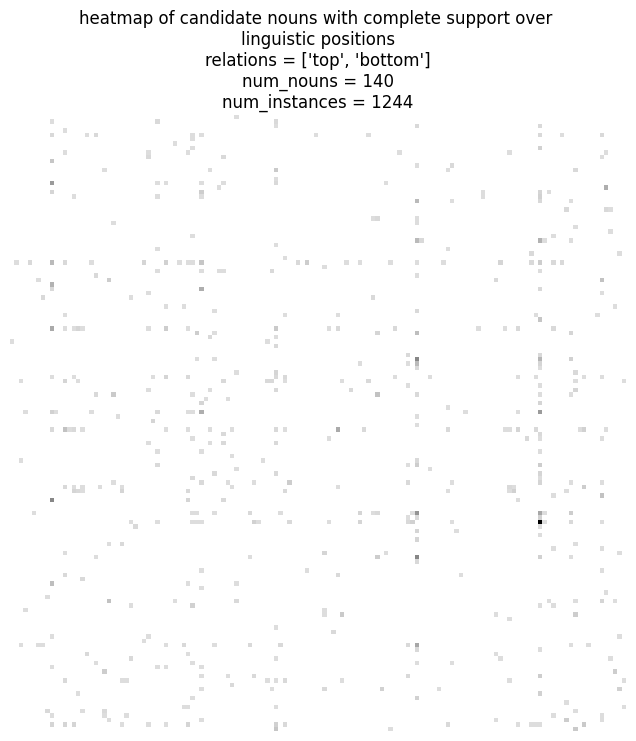

In [95]:
c = Counter(train_triplets)
print(c.most_common(3))

min_y, max_x = 0.1, 80
max_y, min_x = 1, 0.9

plt.figure(figsize=(8,8))
heatmap = np.zeros((len(both_complete_nouns), len(both_complete_nouns)))
X = []

for k, o1 in enumerate(both_complete_nouns):
    for l, o2 in enumerate(both_complete_nouns):
        #if k == l: continue
        x = min(max_x, c[(n2i[o1], n2i[o2], 0)] + c[(n2i[o1], n2i[o2], 1)])
        X.append(x)
        y = 0 if x == 0 else 1/(max_x-min_x) * ((1-min_y)*x + max_x*min_y - min_x)
        heatmap[k][l] = y
plt.imshow(heatmap, cmap='binary', interpolation='nearest')
plt.title("heatmap of candidate nouns with complete support over \n{} positions\nrelations = {}\nnum_nouns = {}\nnum_instances = {}"
          .format(
              "image" if transpose else "linguistic",
              list(r2i.keys()),
              len(both_complete_nouns),
              sum(X)
        ))
plt.axis("off")
plt.show()

In [96]:
heatmap = {}
for transpose in [False, True]:
    train_triplets = []
    for subj, obj, r in tuples:
        train_triplets.append((n2i[subj], n2i[obj], r2i[r]))
    if transpose: train_triplets = Transpose(train_triplets)

    c = Counter(train_triplets)
    print(c.most_common(3))

    prefix = "image" if transpose else "linguistic"
    heatmap[prefix] = np.zeros((len(both_complete_nouns), len(both_complete_nouns)))
    X = []
    for k, o1 in enumerate(both_complete_nouns):
        for l, o2 in enumerate(both_complete_nouns):
            x = c[(n2i[o1], n2i[o2], 0)] + c[(n2i[o1], n2i[o2], 1)]
            X.append(x)
            heatmap[prefix][k][l] = x


[((292, 385, 0), 58), ((64, 315, 0), 33), ((356, 185, 0), 24)]
[((292, 385, 0), 58), ((64, 315, 0), 33), ((356, 185, 0), 24)]


In [97]:
dead = []
iters = 0
killed_this_iter = True
while np.sum(heatmap['image']) * np.sum(heatmap['linguistic']) > 0 and killed_this_iter:
    killed_this_iter = False
    sum_axis0, sum_axis1 = np.sum(heatmap['image'], axis=0), np.sum(heatmap['image'], axis=1)
    for i, s in enumerate(sum_axis0):
        if i in dead: continue
        if s == 0:
            for j in range(len(both_complete_nouns)):
                # drop row i
                heatmap['image'][i][j] = 0
                # drop row i and col i
                heatmap['linguistic'][i][j] = 0
                heatmap['linguistic'][j][i] = 0

            dead.append(i)
            killed_this_iter = True
    for i, s in enumerate(sum_axis1):
        if i in dead: continue
        if s == 0:
            for j in range(len(both_complete_nouns)):
                # drop col i
                heatmap['image'][j][i] = 0
                # drop row i and col i
                heatmap['linguistic'][i][j] = 0
                heatmap['linguistic'][j][i] = 0
            dead.append(i)
            killed_this_iter = True

    sum_axis0, sum_axis1 = np.sum(heatmap['linguistic'], axis=0), np.sum(heatmap['linguistic'], axis=1)
    for i, s in enumerate(sum_axis0):
        if i in dead: continue
        if s == 0:
            for j in range(len(both_complete_nouns)):
                # drop row i
                heatmap['linguistic'][i][j] = 0
                # drop row i and col i
                heatmap['image'][i][j] = 0
                heatmap['image'][j][i] = 0

            dead.append(i)
            killed_this_iter = True
    for i, s in enumerate(sum_axis1):
        if i in dead: continue
        if s == 0:
            for j in range(len(both_complete_nouns)):
                # drop col i
                heatmap['linguistic'][j][i] = 0
                # drop row i and col i
                heatmap['image'][i][j] = 0
                heatmap['image'][j][i] = 0
            dead.append(i)
            killed_this_iter = True

    iters += 1
    print(f"dead nouns = {len(dead)}")
    print(f"""finish iter {iters}, 
          remaining examples = {np.sum(heatmap['image'])} (image), 
          {np.sum(heatmap['linguistic'])} (linguistic)""")    


dead nouns = 53
finish iter 1, 
          remaining examples = 895.0 (image), 
          895.0 (linguistic)
dead nouns = 61
finish iter 2, 
          remaining examples = 792.0 (image), 
          792.0 (linguistic)
dead nouns = 62
finish iter 3, 
          remaining examples = 787.0 (image), 
          787.0 (linguistic)
dead nouns = 63
finish iter 4, 
          remaining examples = 784.0 (image), 
          784.0 (linguistic)
dead nouns = 63
finish iter 5, 
          remaining examples = 784.0 (image), 
          784.0 (linguistic)


In [100]:
alive = set(list(range(len(both_complete_nouns)))) - set(dead)
alive = sorted(list(alive))
print("nouns with complete support".format(alive))
print(len(alive))
rows = np.array(alive, dtype=np.intp)
columns = np.array(alive, dtype=np.intp)

bijective_heatmap = heatmap['linguistic'][np.ix_(rows, columns)]
print("sanity check (linguistic): every row sum or col sum is positive")
print(np.min(np.sum(bijective_heatmap, axis=0)), np.min(np.sum(bijective_heatmap, axis=1)))

bijective_heatmap = heatmap['image'][np.ix_(rows, columns)]
print("sanity check (image): every row sum or col sum is positive")
print(np.min(np.sum(bijective_heatmap, axis=0)), np.min(np.sum(bijective_heatmap, axis=1)))


nouns with complete support
77
sanity check (linguistic): every row sum or col sum is positive
1.0 1.0
sanity check (image): every row sum or col sum is positive
1.0 1.0


In [99]:
crux = alive # They are both_complete_nouns' indices
print(len(crux))
crux_nouns = [both_complete_nouns[i] for i in crux]
#pprint(crux_nouns)

77


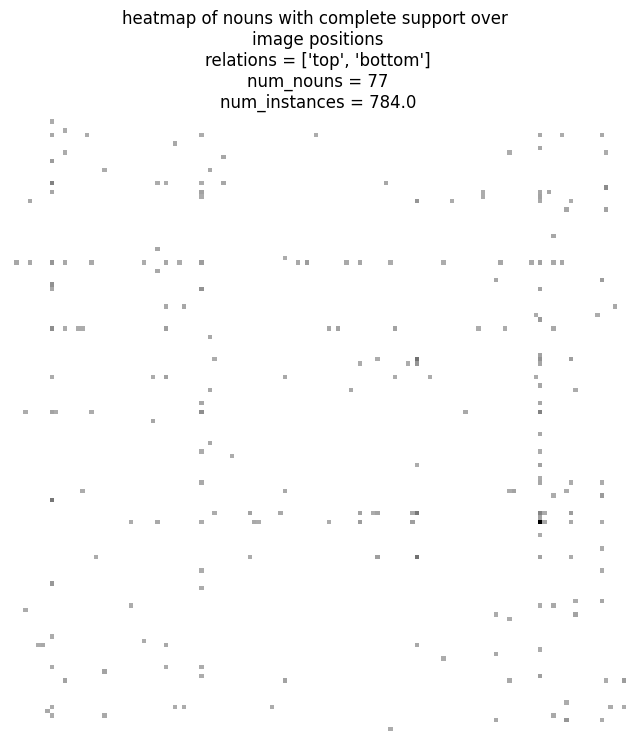

In [222]:

min_y, max_x = 0.3, 80
max_y, min_x = 1, 0.9

plt.figure(figsize=(8,8))
visualize_heatmap = np.zeros((len(both_complete_nouns), len(both_complete_nouns)))
X = []

prefix = "image" if transpose else "linguistic"
for k in alive:
    for l in alive:
        o1, o2 = both_complete_nouns[k], both_complete_nouns[l]        
        x = min(max_x, heatmap[prefix][k][l])
        X.append(x)
        y = 0 if x == 0 else 1/(max_x-min_x) * ((1-min_y)*x + max_x*min_y - min_x)
        visualize_heatmap[k][l] = y
plt.imshow(visualize_heatmap, cmap='binary', interpolation='nearest')
plt.title("heatmap of nouns with complete support over \n{} positions\nrelations = {}\nnum_nouns = {}\nnum_instances = {}"
          .format(
              prefix,
              list(r2i.keys()),
              len(alive),
              sum(X)
        ))
plt.axis("off")
plt.show()

In [102]:
for transpose in [False, True]:
    print("role intrinsic meanings: {} position\n".format("image" if transpose else "linguistic"))
    SUBJ, OBJ = [], []
    tuples, images, captions = [], [], []
    for a in annotations:
        r = a['relation_name']
        if not r in positional_rel_v: continue
        
        subj, obj = re.findall(rf'the ([a-zA-Z\s-]+) is {r} the ([a-zA-Z\s]+)', a['true_caption'])[0]
        r = map[r]

        #singularize
        singlular_subj = Word(subj).lemmatize()
        if not singlular_subj == False: subj = singlular_subj
        singlular_obj = Word(obj).lemmatize() 
        if not singlular_obj == False: obj = singlular_obj

        if subj in crux_nouns and obj in crux_nouns:
            SUBJ.append(subj)
            OBJ.append(obj)
            tuples.append((subj, obj, r))
            captions.append(a['true_caption'])
            images.append(a['image_path'])
    
    nouns = sorted(list(set(SUBJ).union(set(OBJ))))
    num_nouns = len(nouns)
    print("#unique concepts = ", num_nouns)
    num_relations = len(relations)
    print("#instances = ", len(tuples))
    print("#unique instances = ", len(set(tuples)))
    print("#unique images = ", len(set(images)))
    print("#unique captions = ", len(set(captions)))
    
    train_triplets = [] # convert tuple elements to indices
    n2i = {n:i for i, n in enumerate(nouns)}
    r2i = {r:i for i, r in enumerate(relations)}
    print(len(r2i), len(n2i), "\n")
    for subj, obj, r in tuples:
        train_triplets.append((n2i[subj], n2i[obj], r2i[r]))
    if transpose: train_triplets = Transpose(train_triplets)

    # Sanity check crux_nouns are indeed complete under both linguistic & image positional roles
    print("#unique O1 = ", len(set([t[0] for t in train_triplets])))
    print("#unique O2 = ", len(set([t[1] for t in train_triplets])))
    df = pd.DataFrame(train_triplets, columns =['O1', 'O2', 'R'])
    for f in entropy_funcs:
        score = eval(f)
        print(f.split("(")[0], ": ", score, f"({round(score/np.log(2), 2)})")  
    print("--------------------------------------------------------\n\n")

role intrinsic meanings: linguistic position

#unique concepts =  77
#instances =  784
#unique instances =  287
#unique images =  488
#unique captions =  395
2 77 

#unique O1 =  77
#unique O2 =  77
concept_role_index_entropy :  0.4796370382616492 (0.69)
--------------------------------------------------------


role intrinsic meanings: image position

#unique concepts =  77
#instances =  784
#unique instances =  287
#unique images =  488
#unique captions =  395
2 77 

#unique O1 =  77
#unique O2 =  77
concept_role_index_entropy :  0.3957979315181901 (0.57)
--------------------------------------------------------




In [229]:
if transpose:
    print(len(train_triplets))
    print("train_triplets under {} positional roles:".format("image" if transpose else "linguistic"))
    print(train_triplets)
    print("unique train_triplets = {}".format(len(set(train_triplets))))
for t in train_triplets:
    if t[0] == t[1]: print(t)

784
train_triplets under image positional roles:
[(49, 63, 1), (49, 63, 1), (49, 63, 0), (49, 63, 0), (49, 63, 0), (52, 49, 0), (52, 49, 0), (49, 63, 0), (52, 49, 0), (30, 49, 0), (30, 49, 0), (18, 41, 1), (18, 41, 1), (18, 41, 0), (49, 63, 0), (47, 49, 0), (32, 63, 1), (32, 63, 1), (32, 63, 0), (21, 6, 0), (21, 6, 0), (45, 72, 0), (9, 18, 0), (18, 6, 0), (9, 19, 0), (26, 6, 1), (26, 6, 0), (26, 6, 0), (26, 6, 0), (18, 6, 0), (18, 57, 0), (52, 49, 0), (29, 49, 0), (8, 24, 0), (8, 24, 1), (9, 6, 0), (10, 73, 0), (49, 63, 0), (49, 63, 0), (47, 49, 0), (52, 63, 0), (70, 8, 0), (70, 8, 1), (47, 49, 0), (49, 63, 1), (49, 63, 1), (29, 49, 0), (49, 29, 1), (49, 29, 0), (49, 63, 0), (21, 6, 0), (47, 64, 0), (43, 72, 0), (12, 23, 0), (16, 18, 1), (16, 18, 1), (16, 18, 0), (26, 66, 0), (11, 6, 0), (35, 1, 0), (76, 45, 0), (70, 76, 1), (70, 76, 1), (70, 76, 1), (10, 73, 0), (49, 63, 0), (49, 63, 0), (49, 63, 1), (49, 63, 0), (49, 63, 0), (35, 63, 0), (49, 18, 0), (49, 72, 0), (49, 18, 1), (20, 72

### Draft